In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython.display import HTML
import seaborn as sns
import pandas as pd
sns.set()
df = pd.read_csv('poverty.csv')
df.head()

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1


In [2]:
X = df.iloc[:, 1:2].values
Y = df.iloc[:, 2:3].values

In [3]:
class Linear:
    def __init__(self, learning_rate):
        self.X = tf.placeholder(tf.float32, (None, 1))
        self.Y = tf.placeholder(tf.float32, (None, 1))
        w = tf.Variable(tf.random_normal([1, 1]))
        b = tf.Variable(tf.random_normal([1]))
        self.logits = tf.matmul(self.X, w) + b
        self.cost = tf.reduce_mean(tf.square(self.Y - self.logits))
        self.optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(self.cost)

In [4]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
model = Linear(0.001)
sess.run(tf.global_variables_initializer())
for i in range(10):
    cost, _ = sess.run([model.cost, model.optimizer], feed_dict={model.X:X, model.Y:Y})
    print('epoch %d, MSE: %f'%(i+1, cost))

epoch 1, MSE: 767.497192
epoch 2, MSE: 312.644745
epoch 3, MSE: 138.829269
epoch 4, MSE: 72.407898
epoch 5, MSE: 47.025581
epoch 6, MSE: 37.325714
epoch 7, MSE: 33.618660
epoch 8, MSE: 32.201656
epoch 9, MSE: 31.659775
epoch 10, MSE: 31.452297


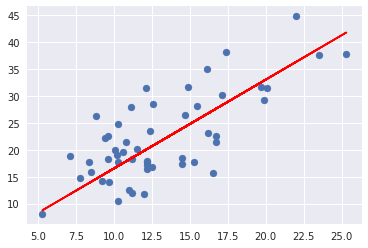

In [5]:
y_output = sess.run(model.logits, feed_dict={model.X:X})
plt.scatter(X[:,0],Y[:,0])
plt.plot(X,y_output, c='red')
plt.show()

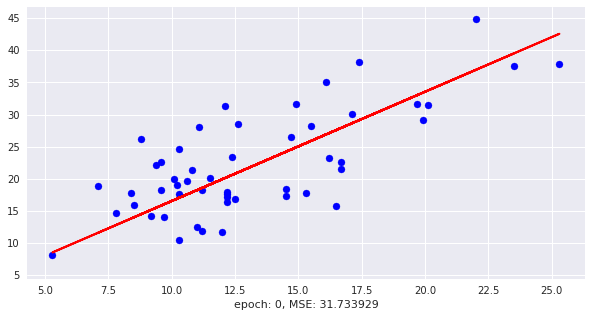

In [6]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
model = Linear(0.001)
sess.run(tf.global_variables_initializer())

fig = plt.figure(figsize=(10,5))
ax = plt.axes()
ax.scatter(X[:,0],Y[:,0], c='b')
cost, y_output = sess.run([model.cost, model.logits], feed_dict={model.X:X, model.Y:Y})
ax.set_xlabel('epoch: %d, MSE: %f'%(0,cost))
line, = ax.plot(X,y_output, lw=2, c='r')

def gradient_mean_square(epoch):
    cost, y_output, _ = sess.run([model.cost, model.logits, model.optimizer], feed_dict={model.X:X, model.Y:Y})
    line.set_data(X,y_output)
    ax.set_xlabel('epoch: %d, MSE: %f'%(epoch,cost))
    return line, ax

anim = animation.FuncAnimation(fig, gradient_mean_square, frames=50, interval=200)
anim.save('animation-linear-regression.gif', writer='imagemagick', fps=10)